# French women and men salaries comparing

Importing all necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset

In [3]:
df = pd.read_csv('net_salary_per_town_categories.csv')

### Unique codes for the data set
```
CODGEO : unique code of the town
LIBGEO : name of the town
SNHM14 : mean net salary
SNHMC14 : mean net salary per hour for executive
SNHMP14 : mean net salary per hour for middle manager
SNHME14 : mean net salary per hour for employee
SNHMO14 : mean net salary per hour for worker
SNHMF14 : mean net salary for women
SNHMFC14 : mean net salary per hour for feminin executive
SNHMFP14 : mean net salary per hour for feminin middle manager
SNHMFE14 : mean net salary per hour for feminin employee
SNHMFO14 : mean net salary per hour for feminin worker
SNHMH14 : mean net salary for man
SNHMHC14 : mean net salary per hour for masculin executive
SNHMHP14 : mean net salary per hour for masculin middle manager
SNHMHE14 : mean net salary per hour for masculin employee
SNHMHO14 : mean net salary per hour for masculin worker
SNHM1814 : mean net salary per hour for 18-25 years old
SNHM2614 : mean net salary per hour for 26-50 years old
SNHM5014 : mean net salary per hour for >50 years old
SNHMF1814 : mean net salary per hour for women between 18-25 years old
SNHMF2614 : mean net salary per hour for women between 26-50 years old
SNHMF5014 : mean net salary per hour for women >50 years old
SNHMH1814 : mean net salary per hour for men between 18-25 years old
SNHMH2614 : mean net salary per hour for men between 26-50 years old
SNHMH5014 : mean net salary per hour for men >50 years old
```

In [6]:
df.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


### Understading how big data set is

In [7]:
df.index.size

5136

### Cleaning and renaming column fields

In [10]:
df_clear = df.copy()
df_clear.drop('CODGEO',axis=1, inplace=True)
df_renamed = df_clear.rename(columns={"LIBGEO": "City", "SNHM14": "Mean", "SNHMC14": "Executive", "SNHMP14": "Middle Manager", "SNHME14":"Employee", "SNHMO14":"Worker", "SNHMF14":"Women", "SNHMFC14":"Fem. Executive", "SNHMFP14":"Fem. Middle Manager", "SNHMFE14":"Fem. Employee", "SNHMFO14":"Fem. Worker", "SNHMH14":"Man", "SNHMHC14":"Men Executive", "SNHMHP14":"Men Middle Manager", "SNHMHE14":"Men Employee", "SNHMHO14":"Men Worker", "SNHM1814":"18-25 year old", "SNHM2614":"26-50 year old", "SNHM5014":">50 year old", "SNHMF1814":"Fem. 18-25 year", "SNHMF2614":"Fem. 26-50 year", "SNHMF5014":"Fem. >50 year", "SNHMH1814":"Men 18-25 year", "SNHMH2614":"Men 26-50 year", "SNHMH5014":"Men >50 year"})
# df_renamed.set_index('City', inplace=True)
df_renamed.describe()

,Mean,Executive,Middle Manager,Employee,Worker,Women,Fem. Executive,Fem. Middle Manager,Fem. Employee,Fem. Worker,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
count,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,...,5136.000000,5136.000000,5136.000000,5136.00000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000
mean,13.706386,23.703836,14.575876,10.564505,11.235650,12.038026,20.220502,13.274260,10.308879,9.827161,...,11.498189,9.549766,13.495444,15.87722,9.161565,12.055160,13.174143,9.820872,14.485981,17.679809
std,2.559329,2.836183,1.490110,0.811775,1.221755,1.787995,2.327550,0.990166,0.747563,1.104684,...,1.289598,0.997444,2.363144,3.58586,0.453023,1.825306,2.249391,1.539949,2.852490,4.530257
min,10.200000,16.000000,11.600000,8.700000,8.300000,9.300000,12.000000,10.600000,8.700000,6.100000,...,8.900000,7.900000,9.700000,10.50000,7.500000,9.100000,9.500000,7.800000,9.600000,10.800000
25%,12.100000,21.900000,13.800000,10.000000,10.600000,10.900000,18.800000,12.600000,9.800000,9.200000,...,10.800000,9.200000,12.000000,13.70000,8.900000,10.900000,11.700000,9.400000,12.700000,14.900000
50%,13.000000,23.200000,14.400000,10.400000,11.000000,11.500000,20.000000,13.100000,10.100000,9.700000,...,11.300000,9.500000,12.900000,15.00000,9.100000,11.600000,12.600000,9.700000,13.800000,16.600000
75%,14.400000,24.900000,15.100000,10.900000,11.600000,12.700000,21.400000,13.800000,10.600000,10.200000,...,11.900000,9.700000,14.300000,16.90000,9.400000,12.700000,14.000000,10.000000,15.500000,19.000000
max,43.300000,51.500000,54.600000,17.500000,46.300000,26.700000,35.500000,19.000000,16.100000,28.100000,...,53.200000,60.600000,38.100000,56.90000,12.000000,26.600000,31.000000,93.300000,45.400000,68.600000


### Checking is there missing values

In [366]:
df_renamed.isnull().sum()

Mean                   0
Executive              0
Middle Manager         0
Employee               0
Worker                 0
Women                  0
Fem. Executive         0
Fem. Middle Manager    0
Fem. Employee          0
Fem. Worker            0
Man                    0
Men Executive          0
Men Middle Manager     0
Men Employee           0
Men Worker             0
18-25 year old         0
26-50 year old         0
>50 year old           0
Fem. 18-25 year        0
Fem. 26-50 year        0
Fem. >50 year          0
Men 18-25 year         0
Men 26-50 year         0
Men >50 year           0
dtype: int64

### Mean of all cities. Let's define hourly mean in the country

In [415]:
hour_mean = df_renamed['Mean'].mean()
hour_mean

13.70638629283489

In [438]:
higher_mean_cities = df_renamed[df_renamed['Mean']>=hour_mean]
higher_mean_cities.index.size

1831

In [439]:
lower_mean_cities = df_renamed[df_renamed['Mean']<hour_mean]
lower_mean_cities.index.size

3305

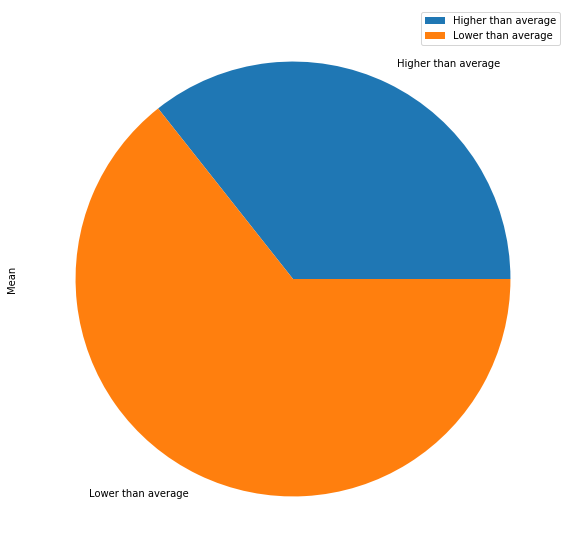

In [441]:
df_city_mean_distribution = pd.DataFrame({'Mean': [higher_mean_cities.index.size, lower_mean_cities.index.size]}, index = ['Higher than average', 'Lower than average'])
pie_plot = df_city_mean_distribution.plot.pie(y='Mean', figsize= [10,10])

In [445]:
higher_mean_cities['Mean'].mean()

16.10191152375751

In [443]:
lower_mean_cities['Mean'].mean()

12.379243570347956

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

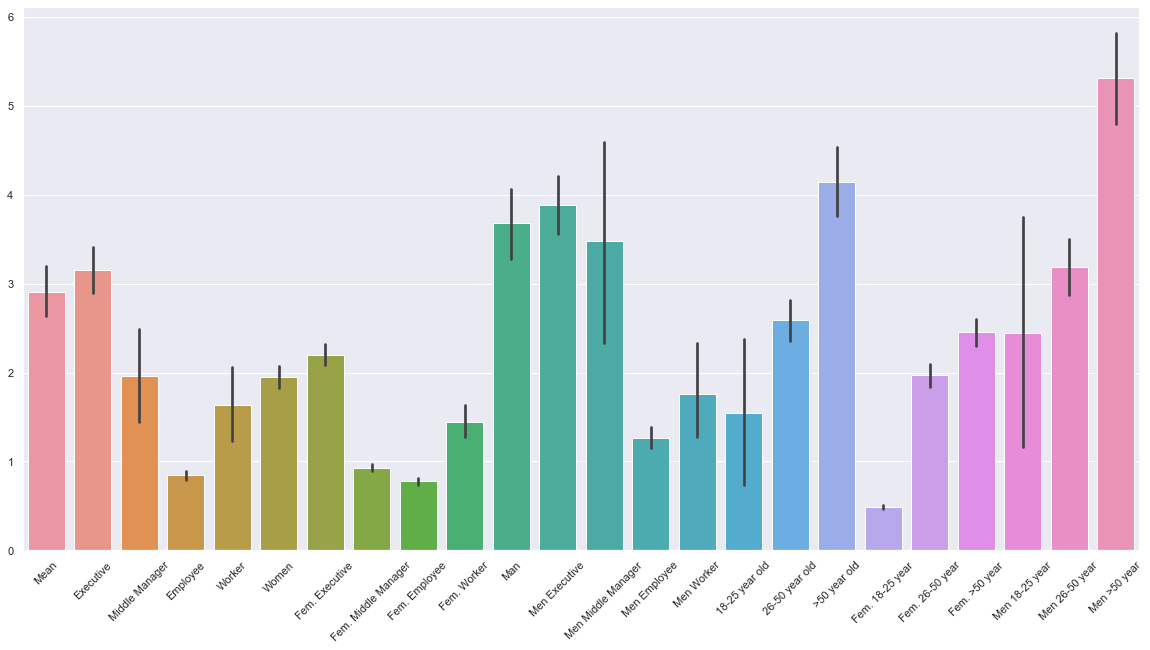

In [473]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=higher_mean_cities, estimator=np.std)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

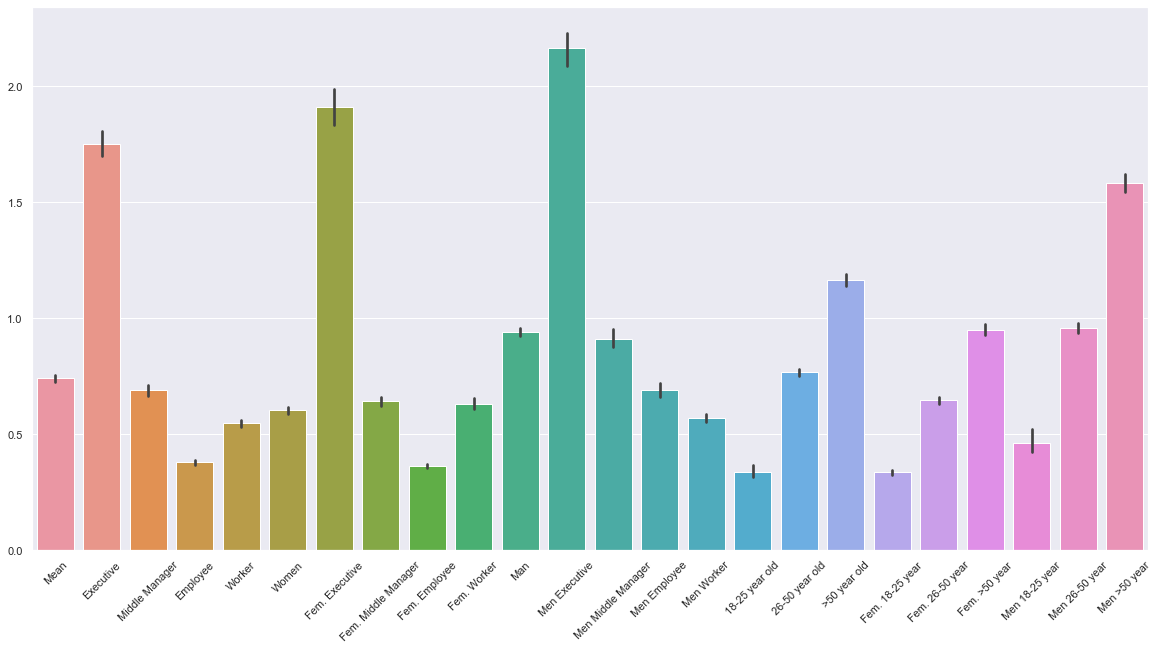

In [475]:
sns.barplot(data=lower_mean_cities, estimator=np.std)
plt.xticks(rotation=45)

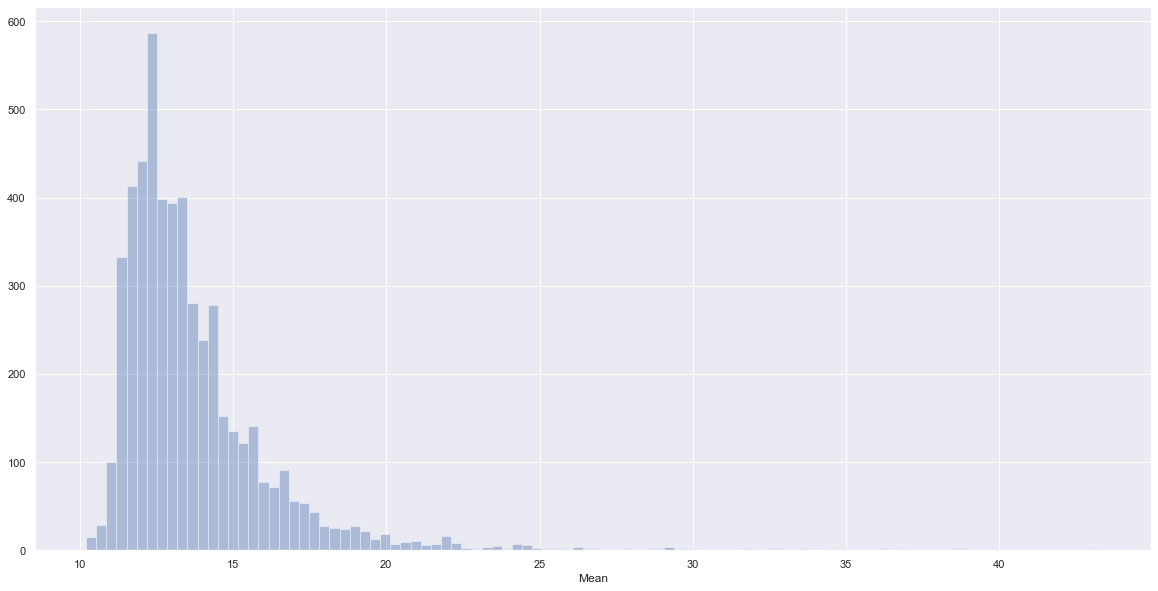

In [476]:
sns.distplot(df_renamed['Mean'],kde=False, bins = 100)

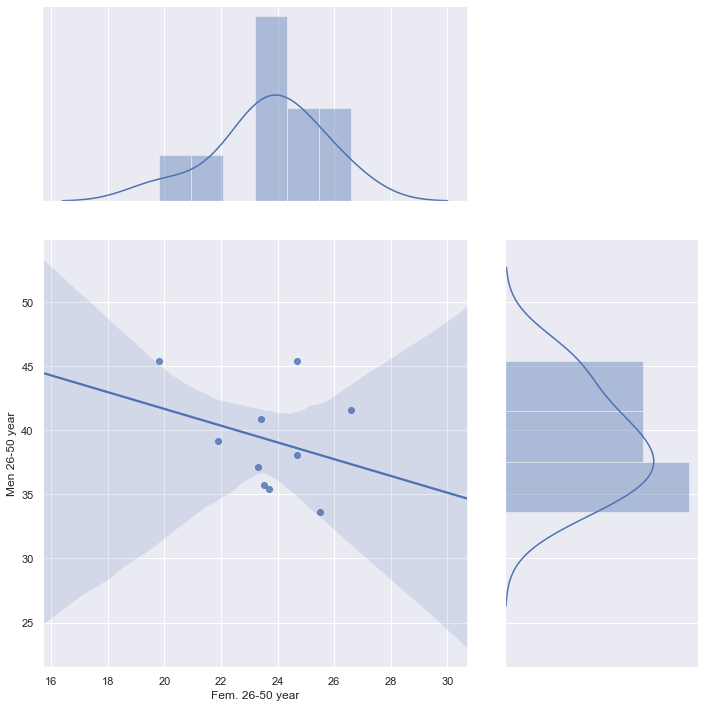

In [491]:
sns.jointplot(x='Fem. 26-50 year', y='Men 26-50 year', data=top, kind='reg', height=10, ratio=2)

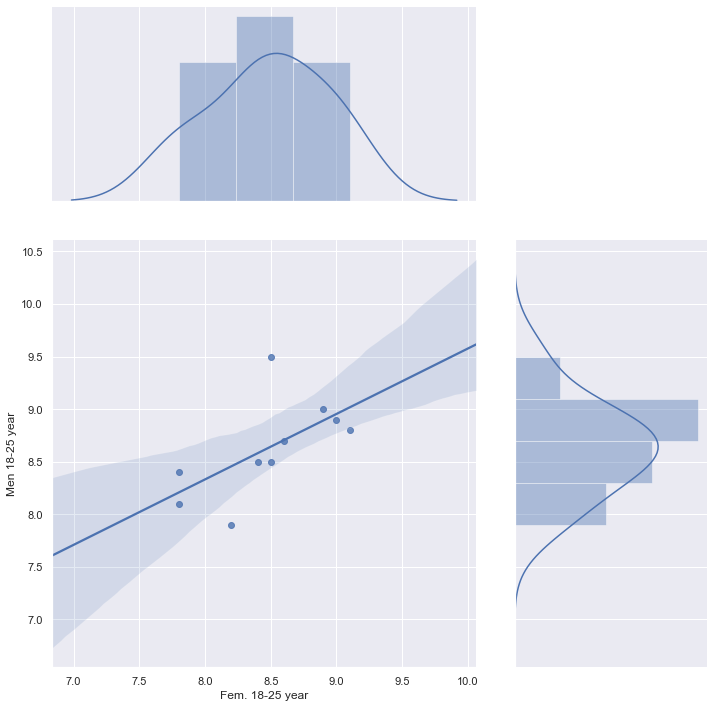

In [490]:
sns.jointplot(x='Fem. 18-25 year', y='Men 18-25 year', data=low, kind='reg', height=10, ratio=2)

In [465]:
# sns.barplot(data=df_renamed[['Man', 'Women']], estimator=np.std)
# sns.barplot(data=df_renamed[['Mean','Man', 'Women']])
# sns.countplot(x='Mean', data=top)

In [461]:
top10_cities = df_renamed[df_renamed['Mean']>=hour_mean].sort_values(by='Mean', ascending=False).head(10)
top10_cities

,City,Mean,Executive,Middle Manager,Employee,Worker,Women,Fem. Executive,Fem. Middle Manager,Fem. Employee,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
4225,Saint-Nom-la-Bretèche,43.3,51.5,37.2,15.6,33.5,24.4,31.8,18.6,14.9,...,35.3,11.4,38.1,56.9,11.4,24.7,25.9,11.4,45.4,68.6
4170,Feucherolles,38.7,47.8,29.0,15.5,25.1,22.8,29.6,16.6,16.1,...,26.4,10.0,32.3,54.0,10.2,21.9,27.1,9.8,39.2,65.8
4173,Fourqueux,38.6,45.9,19.1,16.5,46.3,23.4,31.0,17.5,13.6,...,53.2,11.5,34.2,49.6,9.7,23.4,26.2,12.6,40.9,59.9
4872,Neuilly-sur-Seine,36.7,47.8,23.4,15.7,22.9,26.7,35.5,19.0,14.6,...,23.5,12.6,34.4,47.6,12.0,26.6,31.0,13.2,41.6,61.3
4237,Le Vésinet,36.3,46.7,19.9,15.1,22.0,25.2,33.4,16.5,13.5,...,23.8,11.3,32.3,50.5,10.9,24.7,30.3,11.6,38.1,62.1
4194,Mareil-Marly,34.5,42.3,19.6,15.5,27.5,23.7,30.4,16.7,13.5,...,27.4,11.0,31.7,42.3,10.9,23.3,26.4,11.0,37.1,49.8
4156,Chambourcy,33.7,39.2,54.6,13.8,19.0,19.7,29.8,16.2,12.3,...,19.8,10.5,35.0,35.6,10.8,19.8,22.1,10.3,45.4,43.6
4169,L'Étang-la-Ville,33.6,42.0,19.8,15.9,24.4,23.6,30.7,16.7,14.7,...,23.8,11.5,30.6,41.6,11.4,23.7,25.8,11.6,35.4,49.2
4881,Vaucresson,32.8,42.9,19.2,15.4,19.2,25.2,33.1,17.0,14.8,...,20.1,10.9,30.1,42.2,10.5,25.5,27.0,11.2,33.6,51.7
4164,Croissy-sur-Seine,32.7,42.8,18.9,14.9,20.8,23.1,30.5,17.2,14.0,...,20.8,11.0,30.3,41.1,10.4,23.5,24.7,11.5,35.7,50.5


In [480]:
bottom10_cities = df_renamed[df_renamed['Mean']<hour_mean].sort_values(by='Mean', ascending=True).head(10)
bottom10_cities

,City,Mean,Executive,Middle Manager,Employee,Worker,Women,Fem. Executive,Fem. Middle Manager,Fem. Employee,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
1184,Bagnères-de-Luchon,10.2,19.6,12.5,9.2,8.8,9.6,19.8,10.8,9.2,...,9.1,9.0,9.9,11.8,9.1,9.6,10.1,8.8,10.2,13.7
2237,Miramont-de-Guyenne,10.3,20.6,13.0,9.3,9.4,9.5,15.3,11.7,9.3,...,9.7,8.1,10.2,11.4,7.8,9.7,9.9,8.4,10.4,12.5
604,Saint-Savinien,10.3,20.7,12.4,9.7,8.7,10.1,17.9,11.9,9.4,...,8.9,8.7,9.8,12.2,8.6,9.6,12.0,8.7,10.0,12.3
763,Aubusson,10.3,19.5,12.7,9.5,8.7,9.6,16.6,11.5,9.3,...,9.1,8.5,9.8,11.7,8.4,9.3,10.5,8.5,10.1,12.7
4314,Blaye-les-Mines,10.3,21.1,12.4,9.5,9.0,9.6,15.6,11.3,9.3,...,9.4,8.5,10.1,11.9,8.5,9.6,10.0,8.5,10.4,13.7
5135,Cilaos,10.4,21.0,13.3,8.9,10.2,9.8,18.3,13.0,8.7,...,10.3,8.9,10.2,12.6,9.0,9.5,11.8,8.9,10.4,12.9
5132,Salazie,10.4,17.3,13.8,9.6,9.8,9.8,13.2,11.4,9.6,...,10.0,9.0,10.6,11.4,8.9,9.9,10.5,9.0,11.0,11.7
1137,La Grand-Combe,10.4,16.0,12.1,9.6,10.0,9.7,19.1,11.2,9.0,...,10.2,9.0,10.1,11.5,8.5,9.1,11.3,9.5,10.6,11.7
230,Ruoms,10.5,21.9,14.1,9.5,8.3,9.8,23.6,12.6,9.5,...,9.3,8.0,10.4,11.8,7.8,9.8,10.5,8.1,10.9,13.2
1176,Le Vigan,10.5,21.4,12.4,9.2,8.9,10.3,18.5,12.3,9.1,...,8.9,8.0,9.7,12.4,8.2,9.9,11.2,7.9,9.6,13.5


In [497]:
top_cities = df_renamed[(df_renamed['Man']>=14.84) & (df_renamed['Women']>=12.03)]
low_cities = df_renamed[(df_renamed['Man']<14.84) & (df_renamed['Women']<12.03)]

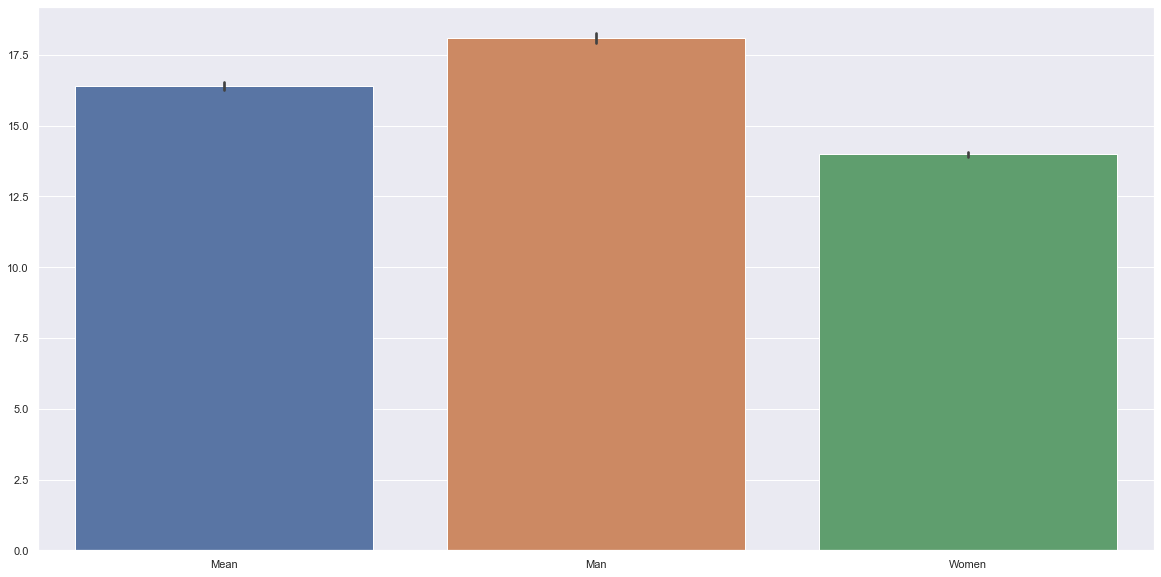

In [498]:
sns.barplot(data=top_cities[['Mean','Man', 'Women']])

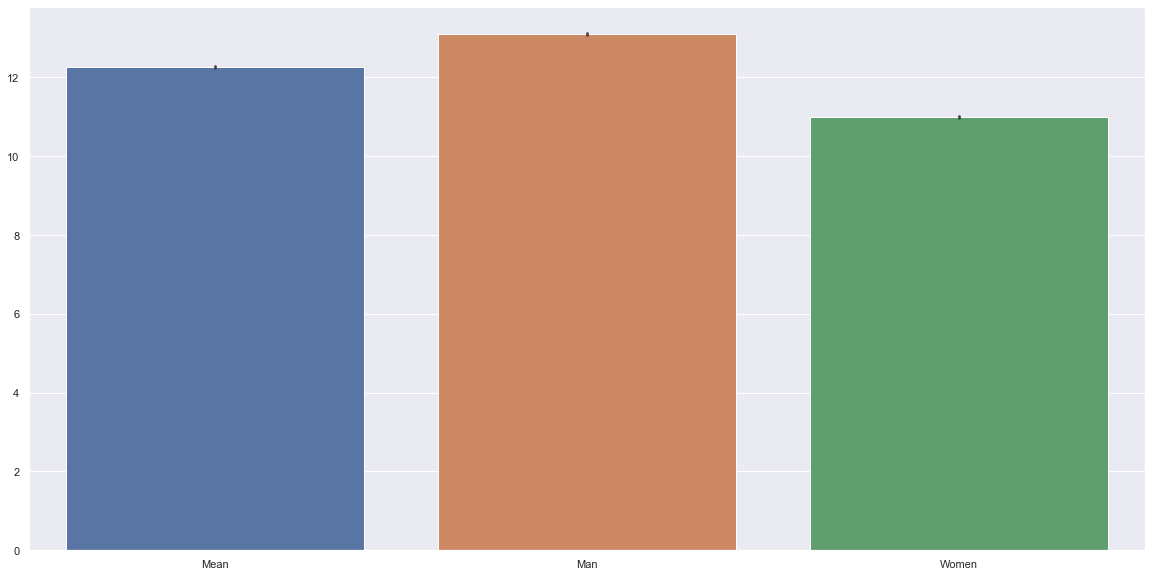

In [499]:
sns.barplot(data=low_cities[['Mean','Man', 'Women']])

In [496]:
top_cities = df_renamed[(df_renamed['Man']>14.84) & (df_renamed['Women']>12.03)]
low_cities = df_renamed[(df_renamed['Man']<14.84) & (df_renamed['Women']>12.03)]

In [482]:
low_cities.count()

City                   277
Mean                   277
Executive              277
Middle Manager         277
Employee               277
Worker                 277
Women                  277
Fem. Executive         277
Fem. Middle Manager    277
Fem. Employee          277
Fem. Worker            277
Man                    277
Men Executive          277
 Men Middle Manager    277
Men Employee           277
Men Worker             277
18-25 year old         277
26-50 year old         277
>50 year old           277
Fem. 18-25 year        277
Fem. 26-50 year        277
Fem. >50 year          277
Men 18-25 year         277
Men 26-50 year         277
Men >50 year           277
dtype: int64

In [486]:
low = lower_mean_cities[['City', 'Mean','Fem. 18-25 year','Fem. 26-50 year', 'Fem. >50 year', 'Men 18-25 year','Men 26-50 year', 'Men >50 year']].sort_values(by='Mean').head(10)
low

,City,Mean,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
1184,Bagnères-de-Luchon,10.2,9.1,9.6,10.1,8.8,10.2,13.7
2237,Miramont-de-Guyenne,10.3,7.8,9.7,9.9,8.4,10.4,12.5
604,Saint-Savinien,10.3,8.6,9.6,12.0,8.7,10.0,12.3
763,Aubusson,10.3,8.4,9.3,10.5,8.5,10.1,12.7
4314,Blaye-les-Mines,10.3,8.5,9.6,10.0,8.5,10.4,13.7
5135,Cilaos,10.4,9.0,9.5,11.8,8.9,10.4,12.9
5132,Salazie,10.4,8.9,9.9,10.5,9.0,11.0,11.7
1137,La Grand-Combe,10.4,8.5,9.1,11.3,9.5,10.6,11.7
230,Ruoms,10.5,7.8,9.8,10.5,8.1,10.9,13.2
1176,Le Vigan,10.5,8.2,9.9,11.2,7.9,9.6,13.5


In [487]:
top = higher_mean_cities[['City', 'Mean','Fem. 18-25 year','Fem. 26-50 year', 'Fem. >50 year', 'Men 18-25 year','Men 26-50 year', 'Men >50 year']].sort_values(by='Mean', ascending=False).head(10)
top

,City,Mean,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
4225,Saint-Nom-la-Bretèche,43.3,11.4,24.7,25.9,11.4,45.4,68.6
4170,Feucherolles,38.7,10.2,21.9,27.1,9.8,39.2,65.8
4173,Fourqueux,38.6,9.7,23.4,26.2,12.6,40.9,59.9
4872,Neuilly-sur-Seine,36.7,12.0,26.6,31.0,13.2,41.6,61.3
4237,Le Vésinet,36.3,10.9,24.7,30.3,11.6,38.1,62.1
4194,Mareil-Marly,34.5,10.9,23.3,26.4,11.0,37.1,49.8
4156,Chambourcy,33.7,10.8,19.8,22.1,10.3,45.4,43.6
4169,L'Étang-la-Ville,33.6,11.4,23.7,25.8,11.6,35.4,49.2
4881,Vaucresson,32.8,10.5,25.5,27.0,11.2,33.6,51.7
4164,Croissy-sur-Seine,32.7,10.4,23.5,24.7,11.5,35.7,50.5


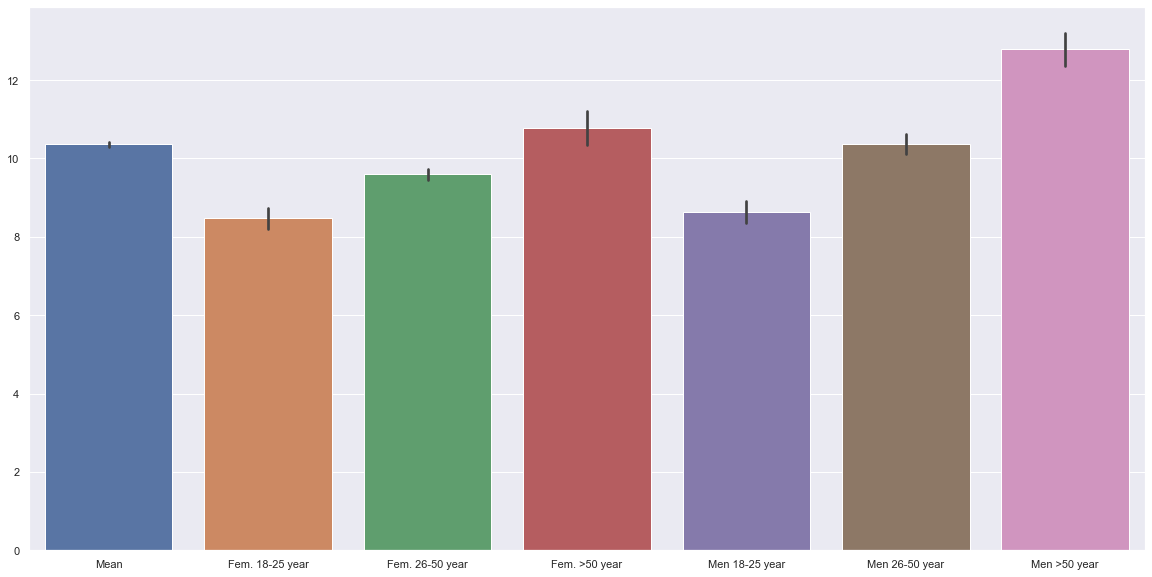

In [489]:
sns.barplot(data=low)

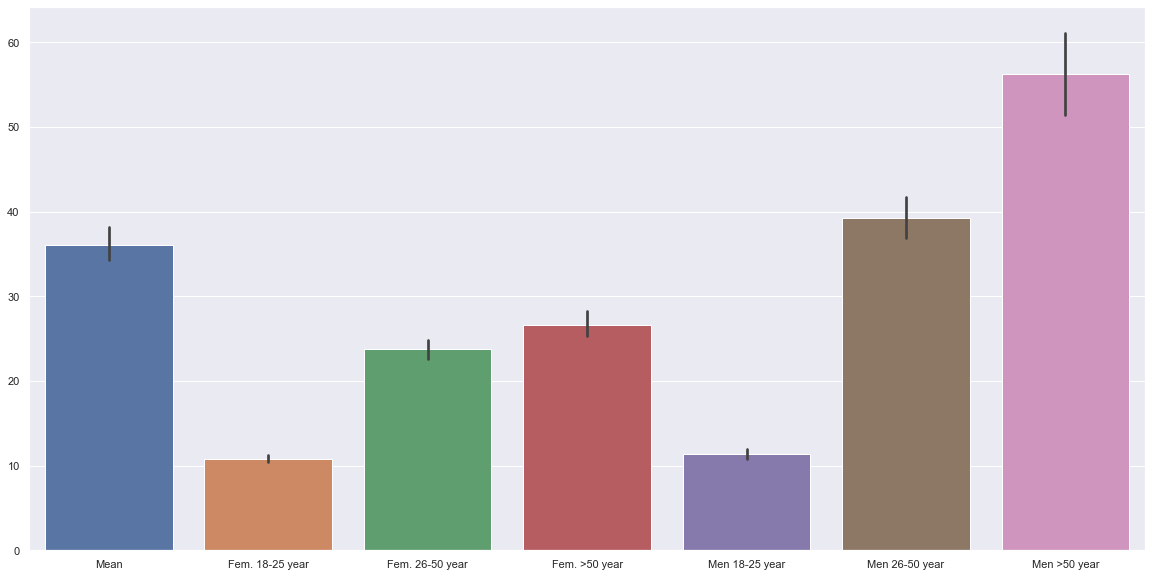

In [488]:
sns.barplot(data=top)